# Goal: learn manually updating gradients 

In [1]:
# inspired from: https://cs231n.github.io/neural-networks-case-study/#grad
import numpy as np
from matplotlib import pyplot as plt

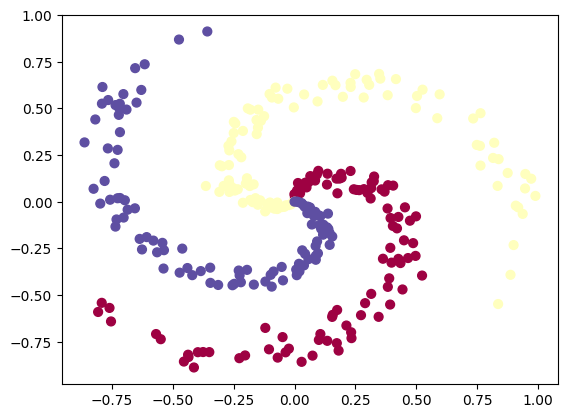

In [2]:
# generate some data
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# Train a Linear Classifier

In [3]:


# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # print(probs[101])   
    # print(probs[range(num_examples),y][101])
    # pick predicted probabilities from probs
    predicted_probs = probs[range(num_examples), y]
    loss = - (1* np.log(predicted_probs))
    average_loss = sum(loss)/num_examples
    
    reg_loss = 0.5*reg*np.sum(W*W)
    total_loss = average_loss +  reg_loss
    if i % 10 == 0:
        print(f"iteration {i}: loss {total_loss}")
    # goal:
    # find dl/W to update W
    
    dscores_dl = probs
    dscores_dl[range(num_examples),y] -= 1
    dscores_dl /= num_examples
    # print(f"dscores_dl: {dscores_dl}")
    # dl/dw = dscores/dl * dw/dscores
    dW_dscores = X.T
    dl_dW = np.dot(dW_dscores, dscores_dl)
    # print(dl_dW)
    
    # find dl/db to update b
    # dl/db = dl_dscores * dscores_db
    
    dscores_db = np.ones(num_examples)
    
    dl_db = np.dot(dscores_db, dscores_dl)
    
    
    dl_dW += reg*W # regularization gradient

    # perform a parameter update
    W += -step_size * dl_dW
    b += -step_size * dl_db
    # break


iteration 0: loss 1.1005599254697132
iteration 10: loss 0.9076686891439865
iteration 20: loss 0.8360117369286917
iteration 30: loss 0.8035904362331666
iteration 40: loss 0.7867622727570426
iteration 50: loss 0.7771914697318029
iteration 60: loss 0.7713933537589263
iteration 70: loss 0.7677172656811234
iteration 80: loss 0.765306029918678
iteration 90: loss 0.7636826221972147
iteration 100: loss 0.7625670000385371
iteration 110: loss 0.7617876731848164
iteration 120: loss 0.7612359977833029
iteration 130: loss 0.7608412088451292
iteration 140: loss 0.7605561447323775
iteration 150: loss 0.7603487675043172
iteration 160: loss 0.7601969606370268
iteration 170: loss 0.760085248030997
iteration 180: loss 0.7600026749026433
iteration 190: loss 0.7599414105829736


In [4]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print(f"training accuracy: {np.mean(predicted_class == y)}")

training accuracy: 0.54


# Train a neural network

In [5]:
# initialize parameters randomly
h = 100 # size of hidden layer
D=2
W1 = 0.01 * np.random.randn(D,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

num_examples = X.shape[0]
for i in range(10000):
    # forward pass
    assert X.shape[1] == W1.shape[0]
    hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
    # print(f"hidden_layer.shape: {hidden_layer.shape}")
    assert hidden_layer.shape[1] == W2.shape[0]
    scores = np.dot(hidden_layer,W2) + b2
    ex_scores = np.exp(scores)
    # move scores into probability space
    probs = ex_scores/np.sum(ex_scores, axis=1, keepdims=True)    
    # loss calculation
    # print(y[0])
    # target_probs = probs[]
    # print(target_probs)
    assert num_examples == len(y)
    # pick predicted probabilities of actual classes 
    predicted_probs = probs[range(num_examples), y]
    # calcualate binary entropy. summation (actual_probability.log(predicted_probability of actual class)
    # 1*actual_class_probability + 0*(non class probabilities)
    loss = - (1* np.log(predicted_probs))
    average_loss = sum(loss)/num_examples
    
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    total_loss = average_loss +  reg_loss
    if i % 1000 == 0:
        print(f"iteration {i}: loss {total_loss}")
    
    # backward propagation
    # goal: calculate dW2_dl, dW1_dl, db1_dl, db2_dl
    #1. dW2_dl = dw2_dscore* dscore_dl    
    dl_dscore = probs
    dl_dscore[range(num_examples), y]-=1
    dl_dscore /= num_examples
    dscore_dW2 = hidden_layer.T
    dl_dW2 = np.dot(dscore_dW2, dl_dscore)
    
    #2. dl_db2 = db2_dscore* dl_dscore
    dl_db2 = np.dot(np.ones(num_examples), dl_dscore)
    # print(dl_db2)
    
    #3. dl_dhidden = dl_dscores * dscores_dhidden
    dl_dhidden = np.dot(dl_dscore, W2.T)
    dl_dhidden[hidden_layer <= 0] = 0 # backpropagate relu 
    #print(dl_dhidden)
    
    #dl_dW1 = dl_dhidden * dhidden_dW1
    dhidden_dW1 = X.T
    dl_dW1 = np.dot(dhidden_dW1, dl_dhidden)
    
    dl_db1 = np.dot(np.ones(num_examples), dl_dhidden)
    # print(dl_db1)
    
    # add regularization gradient contribution
    dl_dW2 += reg * W2
    dl_dW1 += reg * W1

    # perform a parameter update
    W1 += -step_size * dl_dW1
    b1 += -step_size * dl_db1
    W2 += -step_size * dl_dW2
    b2 += -step_size * dl_db2
        
        
    


iteration 0: loss 1.110249830247566
iteration 1000: loss 0.25579400821229537
iteration 2000: loss 0.19653579666738802
iteration 3000: loss 0.1902848386902773
iteration 4000: loss 0.18746414175544285
iteration 5000: loss 0.18680348514734813
iteration 6000: loss 0.18652140272156115
iteration 7000: loss 0.18644042737916192
iteration 8000: loss 0.18640020862000617
iteration 9000: loss 0.1863558309832692


# Evaluation

In [6]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print(f"training accuracy: {(np.mean(predicted_class == y))}")

training accuracy: 0.99
